## 1. Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load The Data

In [2]:
df = pd.read_csv("C:\\Users\\nitya\\Desktop\\Notes\\T5\\MLA-II\\ETE\\ET\\data.csv")
df.shape

(171, 28)

In [3]:
# Map 'Low' to 0 and 'High' to 1 in the 'HDI-UN_Binary' column
df['HDI-UN_Binary'] = df['HDI-UN_Binary'].map({'Poor Life Quality': 0, 'Good Life Quality': 1})

# Display the modified DataFrame
df.head()

,Density (P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,HDI-UN,HDI-UN_Binary
0,60,58.1,652230,323000,32.49,8672,149.90,2.3,4.47,2.1,...,78.4,0.28,38041754,48.9,9.3,71.4,11.12,9797273,0.48,0
1,105,43.1,28748,9000,11.78,4536,119.05,1.4,1.62,28.1,...,56.9,1.20,2854191,55.7,18.6,36.6,12.33,1747593,0.80,1
2,18,17.4,2381741,317000,24.28,150006,151.36,2.0,3.02,0.8,...,28.1,1.72,43053054,41.2,37.2,66.1,11.70,31510100,0.74,1
3,26,47.5,1246700,117000,40.73,34693,261.73,17.1,5.52,46.3,...,33.4,0.21,31825295,77.5,9.2,49.1,6.89,21061025,0.59,1
4,17,54.3,2780400,105000,17.02,201348,232.75,53.5,2.26,9.8,...,17.6,3.96,44938712,61.3,10.1,106.3,9.79,41339571,0.84,1


In [4]:
df.shape

(171, 28)

## 3. Exploratory Data Analysis

In [5]:
# Get summary statistics of numerical features
df.describe()

,Density (P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,HDI-UN,HDI-UN_Binary
count,171.000000,171.000000,1.710000e+02,1.710000e+02,171.000000,1.710000e+02,171.000000,171.000000,171.000000,171.000000,...,171.000000,171.000000,1.710000e+02,171.000000,171.000000,171.000000,171.000000,1.710000e+02,171.000000,171.000000
mean,212.736842,39.930760,7.612812e+05,1.495632e+05,20.277485,1.948283e+05,182.890351,7.166082,2.684386,30.692398,...,33.507018,1.810394,4.381302e+07,62.880117,16.149708,41.058480,7.114327,2.437112e+07,0.720117,0.900585
std,687.022472,21.900871,2.028889e+06,3.675477e+05,9.716846,8.778868e+05,354.851570,16.158790,1.244813,23.781911,...,19.333006,1.645718,1.539123e+08,10.406998,6.909775,20.982488,5.356437,7.920461e+07,0.152288,0.300097
min,2.000000,0.600000,1.810000e+02,0.000000e+00,6.400000,6.600000e+01,99.550000,-4.300000,0.980000,0.000000,...,0.200000,0.010000,1.823300e+04,38.000000,0.000000,8.500000,0.090000,1.449100e+04,0.390000,0.000000
25%,31.500000,23.200000,3.612250e+04,9.000000e+03,11.350000,3.661500e+03,115.360000,1.550000,1.700000,10.800000,...,17.700000,0.325000,2.953005e+06,56.350000,11.500000,30.600000,3.445000,1.808720e+06,0.595000,1.000000
50%,83.000000,40.500000,1.762150e+05,2.900000e+04,18.180000,1.677700e+04,129.610000,3.300000,2.260000,31.100000,...,32.100000,1.410000,1.010169e+07,63.000000,15.100000,37.200000,5.470000,5.448597e+06,0.730000,1.000000
75%,160.000000,56.950000,5.952955e+05,1.370000e+05,28.445000,8.503400e+04,176.010000,9.100000,3.565000,47.450000,...,45.600000,2.905000,3.213634e+07,68.800000,20.900000,48.000000,9.750000,1.664211e+07,0.835000,1.000000
max,8358.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,9.893038e+06,4583.710000,187.900000,6.910000,98.300000,...,81.600000,8.420000,1.397715e+09,86.800000,37.200000,219.600000,28.180000,8.429340e+08,0.960000,1.000000


In [6]:
# Check for missing values
df.isnull().sum()

Density (P/Km2)                              0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mortality                             0
Life expectancy                              0
Maternal mortality ratio                     0
Minimum wage                                 0
Out of pocket health expenditure             0
Physicians per thousand                      0
Population                                   0
Population: L

In [7]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Density (P/Km2)                            171 non-null    int64  
 1   Agricultural Land( %)                      171 non-null    float64
 2   Land Area(Km2)                             171 non-null    int64  
 3   Armed Forces size                          171 non-null    int64  
 4   Birth Rate                                 171 non-null    float64
 5   Co2-Emissions                              171 non-null    int64  
 6   CPI                                        171 non-null    float64
 7   CPI Change (%)                             171 non-null    float64
 8   Fertility Rate                             171 non-null    float64
 9   Forested Area (%)                          171 non-null    float64
 10  Gasoline Price            

In [8]:
class_counts = df['HDI-UN_Binary'].value_counts()
class_counts

1    154
0     17
Name: HDI-UN_Binary, dtype: int64

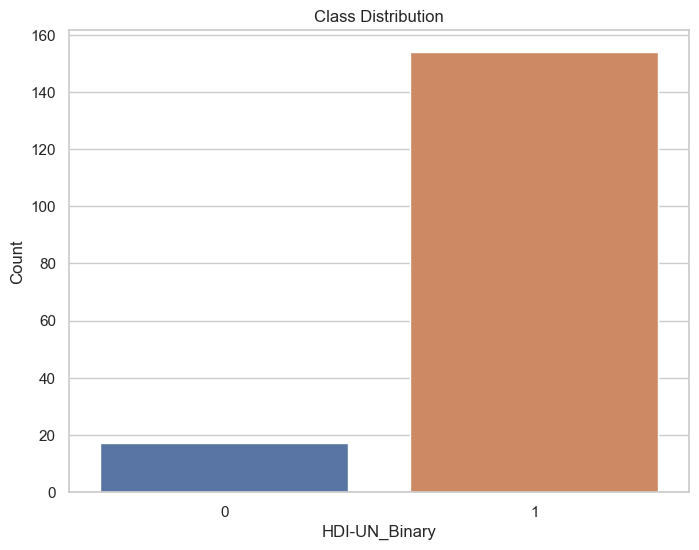

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='HDI-UN_Binary')

plt.xlabel('HDI-UN_Binary')

plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# 4. Class Imbalance Handling - Oversampling

In [10]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
from imblearn.over_sampling import RandomOverSampler

In [12]:
from sklearn.model_selection import train_test_split

# Split your dataset into features (X) and labels (y)
X, y = df.drop(columns=['HDI-UN','HDI-UN_Binary']), df['HDI-UN_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
print(X.shape)
print(y.shape)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 26)
(171,)
(119, 26)
(52, 26)
(119,)
(52,)


In [14]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

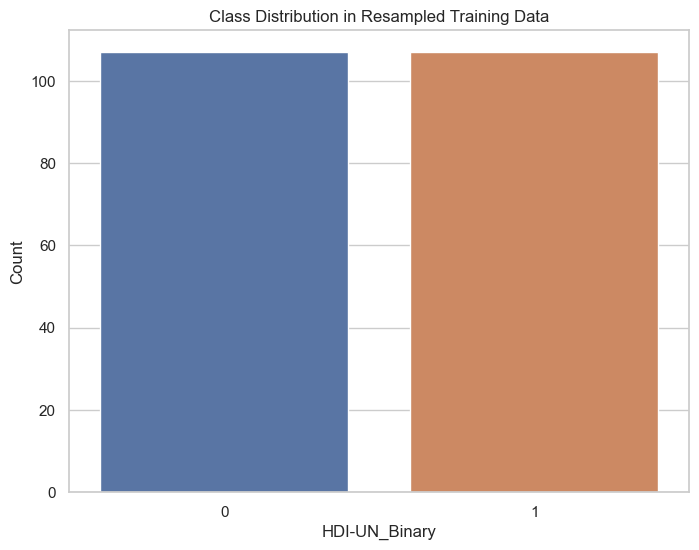

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)

plt.xlabel('HDI-UN_Binary')

plt.ylabel('Count')
plt.title('Class Distribution in Resampled Training Data')
plt.show()

## 5. Bagging - Random Forest

In [16]:
# Create the Random Forest model
random_forest = RandomForestClassifier(random_state=215)

# Train the model on the oversampled training data
random_forest.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_test = random_forest.predict(X_test)

# Evaluate the model on the actual test set
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
matrix_test = confusion_matrix(y_test, y_pred_test)

print(f'Accuracy on Test Set: {accuracy_test:.2f}')
print(report_test)
print(matrix_test)

Accuracy on Test Set: 0.88
              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.98      0.89      0.93        47

    accuracy                           0.88        52
   macro avg       0.71      0.85      0.75        52
weighted avg       0.93      0.88      0.90        52

[[ 4  1]
 [ 5 42]]


Accuracy on Test Set (Random Forest): 0.88
This indicates that the model correctly predicted the class labels for approximately 88% of the instances in the test set.
Precision, Recall, and F1-Score:

Precision: For class 0, the precision is 0.44, suggesting that 44% of the instances predicted as class 0 were actually class 0. For class 1, the precision is high at 98%, indicating that when the model predicts class 1, it is often correct.

Recall: For class 0, the recall is 0.80, indicating that the model identified 80% of the actual instances of class 0. For class 1, the recall is 89%, suggesting that the model captured a high percentage of the actual instances of class 1.

F1-Score: The F1-score, a balance between precision and recall, is 0.90.

Support: For class 0, there are 5 instances, and for class 1, there are 47 instances.

Confusion Matrix: The confusion matrix provides a more detailed breakdown of correct and incorrect predictions.
- True Positives (TP): 42 instances predicted as class 1 were actually class 1.
- False Positives (FP): 1 instance predicted as class 1 was actually class 0.
- True Negatives (TN): 4 instances predicted as class 0 were actually class 0.
- False Negatives (FN): 5 instances predicted as class 0 were actually class 1.

## 6. AdaBoost

In [17]:
from sklearn.ensemble import AdaBoostClassifier

# Create the AdaBoost model
adaboost = AdaBoostClassifier(random_state=215)

# Train the model on the oversampled training data
adaboost.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_test_adaboost = adaboost.predict(X_test)

# Evaluate the model on the actual test set
accuracy_test_adaboost = accuracy_score(y_test, y_pred_test_adaboost)
report_test_adaboost = classification_report(y_test, y_pred_test_adaboost)
matrix_test_adaboost = confusion_matrix(y_test, y_pred_test_adaboost)

print(f'Accuracy on Test Set (AdaBoost): {accuracy_test_adaboost:.2f}')
print(report_test_adaboost)
print(matrix_test_adaboost)

Accuracy on Test Set (AdaBoost): 0.87
              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       0.95      0.89      0.92        47

    accuracy                           0.87        52
   macro avg       0.66      0.75      0.69        52
weighted avg       0.90      0.87      0.88        52

[[ 3  2]
 [ 5 42]]


Accuracy on Test Set (AdaBoost): 0.87
This indicates that the model correctly predicted the class labels for approximately 87% of the instances in the test set.
Precision, Recall, and F1-Score:

Precision: For class 0, the precision is 0.38, suggesting that 38% of the instances predicted as class 0 were actually class 0. For class 1, the precision is high at 95%, indicating that when the model predicts class 1, it is often correct.

Recall: For class 0, the recall is 0.60, indicating that the model identified 60% of the actual instances of class 0. For class 1, the recall is 89%, suggesting that the model captured a high percentage of the actual instances of class 1.

F1-Score: The F1-score, a balance between precision and recall, is 0.88.

Support: For class 0, there are 5 instances, and for class 1, there are 47 instances.

Confusion Matrix: The confusion matrix provides a more detailed breakdown of correct and incorrect predictions.
- True Positives (TP): 42 instances predicted as class 1 were actually class 1.
- False Positives (FP): 2 instances predicted as class 1 were actually class 0.
- True Negatives (TN): 3 instances predicted as class 0 were actually class 0.
- False Negatives (FN): 5 instances predicted as class 0 were actually class 1.

## 7. XGBoost

In [18]:
from xgboost import XGBClassifier

# Create the XGBoost model
xgboost = XGBClassifier(random_state=215)

# Train the model on the oversampled training data
xgboost.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_test_xgboost = xgboost.predict(X_test)

# Evaluate the model on the actual test set
accuracy_test_xgboost = accuracy_score(y_test, y_pred_test_xgboost)
report_test_xgboost = classification_report(y_test, y_pred_test_xgboost)
matrix_test_xgboost = confusion_matrix(y_test, y_pred_test_xgboost)

print(f'Accuracy on Test Set (XGBoost): {accuracy_test_xgboost:.2f}')
print(report_test_xgboost)
print(matrix_test_xgboost)

Accuracy on Test Set (XGBoost): 0.85
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.93      0.89      0.91        47

    accuracy                           0.85        52
   macro avg       0.61      0.65      0.62        52
weighted avg       0.87      0.85      0.86        52

[[ 2  3]
 [ 5 42]]


Accuracy on Test Set (XGBoost): 0.85
This indicates that the model correctly predicted the class labels for approximately 85% of the instances in the test set.
Precision, Recall, and F1-Score:

Precision: Precision measures the accuracy of the positive predictions. In this case, for class 0, the precision is 0.29, indicating that only 29% of the instances predicted as class 0 were actually class 0. For class 1, the precision is high at 93%, suggesting that when the model predicts class 1, it is often correct.

Recall: Recall, or sensitivity, measures the ability of the model to capture all the positive instances. For class 0, the recall is 0.40, indicating that the model identified 40% of the actual instances of class 0. For class 1, the recall is 89%, suggesting that the model captured a high percentage of the actual instances of class 1.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The weighted average F1-score is 0.86.

Support: Support represents the number of actual occurrences of each class in the specified dataset. For class 0, there are 5 instances, and for class 1, there are 47 instances.

Confusion Matrix: The confusion matrix provides a more detailed breakdown of correct and incorrect predictions.
- True Positives (TP): 42 instances predicted as class 1 were actually class 1.
- False Positives (FP): 3 instances predicted as class 1 were actually class 0.
- True Negatives (TN): 2 instances predicted as class 0 were actually class 0.
- False Negatives (FN): 5 instances predicted as class 0 were actually class 1.

## 8. Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=215)

# Train the model on the oversampled training data
gradient_boosting.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_test_gradient_boosting = gradient_boosting.predict(X_test)

# Evaluate the model on the actual test set
accuracy_test_gradient_boosting = accuracy_score(y_test, y_pred_test_gradient_boosting)
report_test_gradient_boosting = classification_report(y_test, y_pred_test_gradient_boosting)
matrix_test_gradient_boosting = confusion_matrix(y_test, y_pred_test_gradient_boosting)

print(f'Accuracy on Test Set (Gradient Boosting): {accuracy_test_gradient_boosting:.2f}')
print(report_test_gradient_boosting)
print(matrix_test_gradient_boosting)

Accuracy on Test Set (Gradient Boosting): 0.85
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.93      0.89      0.91        47

    accuracy                           0.85        52
   macro avg       0.61      0.65      0.62        52
weighted avg       0.87      0.85      0.86        52

[[ 2  3]
 [ 5 42]]


Accuracy on Test Set (Gradient Boosting): 0.85
This indicates that the model correctly predicted the class labels for approximately 85% of the instances in the test set.

Precision: For class 0, the precision is 0.29, suggesting that 29% of the instances predicted as class 0 were actually class 0. For class 1, the precision is high at 93%, indicating that when the model predicts class 1, it is often correct.

Recall: For class 0, the recall is 0.40, indicating that the model identified 40% of the actual instances of class 0. For class 1, the recall is 89%, suggesting that the model captured a high percentage of the actual instances of class 1.

F1-Score: The F1-score, a balance between precision and recall, is 0.86.

Support: For class 0, there are 5 instances, and for class 1, there are 47 instances.

Confusion Matrix: The confusion matrix provides a more detailed breakdown of correct and incorrect predictions.
- True Positives (TP): 42 instances predicted as class 1 were actually class 1.
- False Positives (FP): 3 instances predicted as class 1 were actually class 0.
- True Negatives (TN): 2 instances predicted as class 0 were actually class 0.
- False Negatives (FN): 5 instances predicted as class 0 were actually class 1.

## 9. Results

In [20]:
rf_importance = random_forest.feature_importances_
xgb_importance = adaboost.feature_importances_
ada_importance = xgboost.feature_importances_
gb_importance = gradient_boosting.feature_importances_

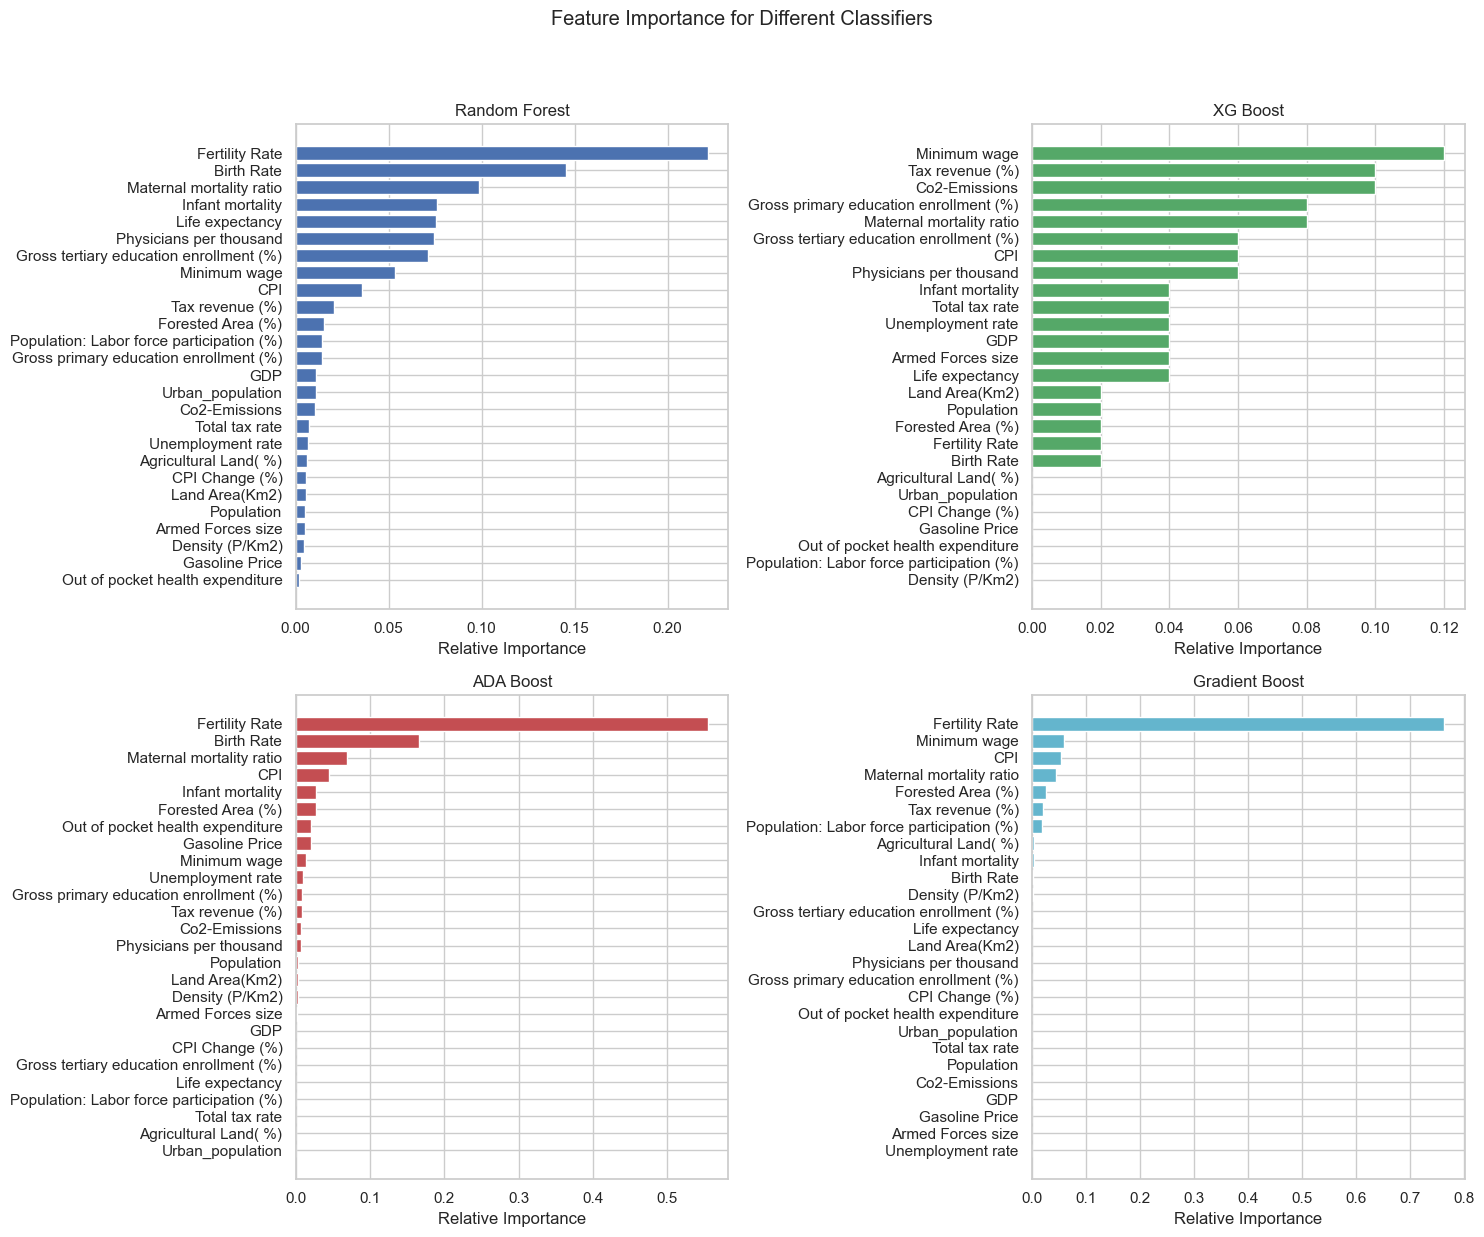

In [21]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 13))
fig.suptitle('Feature Importance for Different Classifiers')

features = df.columns

# Random Forest
indices_rf = np.argsort(rf_importance)
axes[0, 0].barh(range(len(indices_rf)), rf_importance[indices_rf], color='b', align='center')
axes[0, 0].set_yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
axes[0, 0].set_xlabel('Relative Importance')
axes[0, 0].set_title('Random Forest')

# XGBoost
indices_xgb = np.argsort(xgb_importance)
axes[0, 1].barh(range(len(indices_xgb)), xgb_importance[indices_xgb], color='g', align='center')
axes[0, 1].set_yticks(range(len(indices_xgb)), [features[i] for i in indices_xgb])
axes[0, 1].set_xlabel('Relative Importance')
axes[0, 1].set_title('XG Boost')

# ADA Boost
indices_ada = np.argsort(ada_importance)
axes[1, 0].barh(range(len(indices_ada)), ada_importance[indices_ada], color='r', align='center')
axes[1, 0].set_yticks(range(len(indices_ada)), [features[i] for i in indices_ada])
axes[1, 0].set_xlabel('Relative Importance')
axes[1, 0].set_title('ADA Boost')

# Gradient Boost
indices_gb = np.argsort(gb_importance)
axes[1, 1].barh(range(len(indices_gb)), gb_importance[indices_gb], color='c', align='center')
axes[1, 1].set_yticks(range(len(indices_gb)), [features[i] for i in indices_gb])
axes[1, 1].set_xlabel('Relative Importance')
axes[1, 1].set_title('Gradient Boost')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [22]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(index=['Random Forest', 'AdaBoost', 'XGBoost', 'Gradient Boosting'],
                           columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Define a function to calculate and store metrics
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    results_df.loc[model_name] = [accuracy, precision, recall, f1]

# Calculate metrics for each model
calculate_metrics(y_test, y_pred_test, 'Random Forest')
calculate_metrics(y_test, y_pred_test_adaboost, 'AdaBoost')
calculate_metrics(y_test, y_pred_test_xgboost, 'XGBoost')
calculate_metrics(y_test, y_pred_test_gradient_boosting, 'Gradient Boosting')

# Print the results DataFrame
print(results_df)

                   Accuracy Precision    Recall  F1 Score
Random Forest      0.884615  0.976744  0.893617  0.933333
AdaBoost           0.865385  0.954545  0.893617  0.923077
XGBoost            0.846154  0.933333  0.893617  0.913043
Gradient Boosting  0.846154  0.933333  0.893617  0.913043


In [23]:
# Print classification reports
print("Random Forest:")
print(classification_report(y_test, y_pred_test))
print('-' * 50)

print("AdaBoost:")
print(classification_report(y_test, y_pred_test_adaboost))
print('-' * 50)

print("XGBoost:")
print(classification_report(y_test, y_pred_test_xgboost))
print('-' * 50)

print("Gradient Boosting:")
print(classification_report(y_test, y_pred_test_gradient_boosting))
print('-' * 50)

Random Forest:
              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.98      0.89      0.93        47

    accuracy                           0.88        52
   macro avg       0.71      0.85      0.75        52
weighted avg       0.93      0.88      0.90        52

--------------------------------------------------
AdaBoost:
              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       0.95      0.89      0.92        47

    accuracy                           0.87        52
   macro avg       0.66      0.75      0.69        52
weighted avg       0.90      0.87      0.88        52

--------------------------------------------------
XGBoost:
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.93      0.89      0.91        47

    accuracy                           0.85   

1. Random Forest:

Accuracy: 88%

Precision: High precision for class 1 (Good Life Quality), indicating that when the model predicts this class, it is often correct (98%).

Recall: Good recall for both classes, with 80% for class 0 and 89% for class 1.

F1-Score: Balanced F1-score (57% for class 0 and 93% for class 1).

Conclusion: Random Forest shows strong performance with a high accuracy and balanced precision and recall.



2. AdaBoost:

Accuracy: 87%

Precision: High precision for class 1 (95%), indicating accurate predictions when the model predicts class 1.

Recall: Relatively lower recall for class 0 (60%) compared to Random Forest.

F1-Score: Balanced F1-score (46% for class 0 and 92% for class 1).

Conclusion: AdaBoost demonstrates good precision but slightly lower recall for class 0.



3. XGBoost:

Accuracy: 85%

Precision: High precision for class 1 (93%), similar to Random Forest.

Recall: Comparable recall to Random Forest, with 40% for class 0 and 89% for class 1.

F1-Score: Balanced F1-score (33% for class 0 and 91% for class 1).

Conclusion: XGBoost performs well, although with slightly lower accuracy and F1-score for class 0.



4. Gradient Boosting:

Accuracy: 85%

Precision: Similar precision to XGBoost, high for class 1 (93%).

Recall: Comparable recall to XGBoost, with 40% for class 0 and 89% for class 1.

F1-Score: Balanced F1-score (33% for class 0 and 91% for class 1).

Conclusion: Gradient Boosting shows performance similar to XGBoost, with good precision and recall for class 1.


Thus all models perform well in predicting the positive class (Good Life Quality), with Random Forest having a slight edge in terms of accuracy. The choice of the best model may depend on the specific goals and requirements of the application, considering the trade-off between precision and recall.

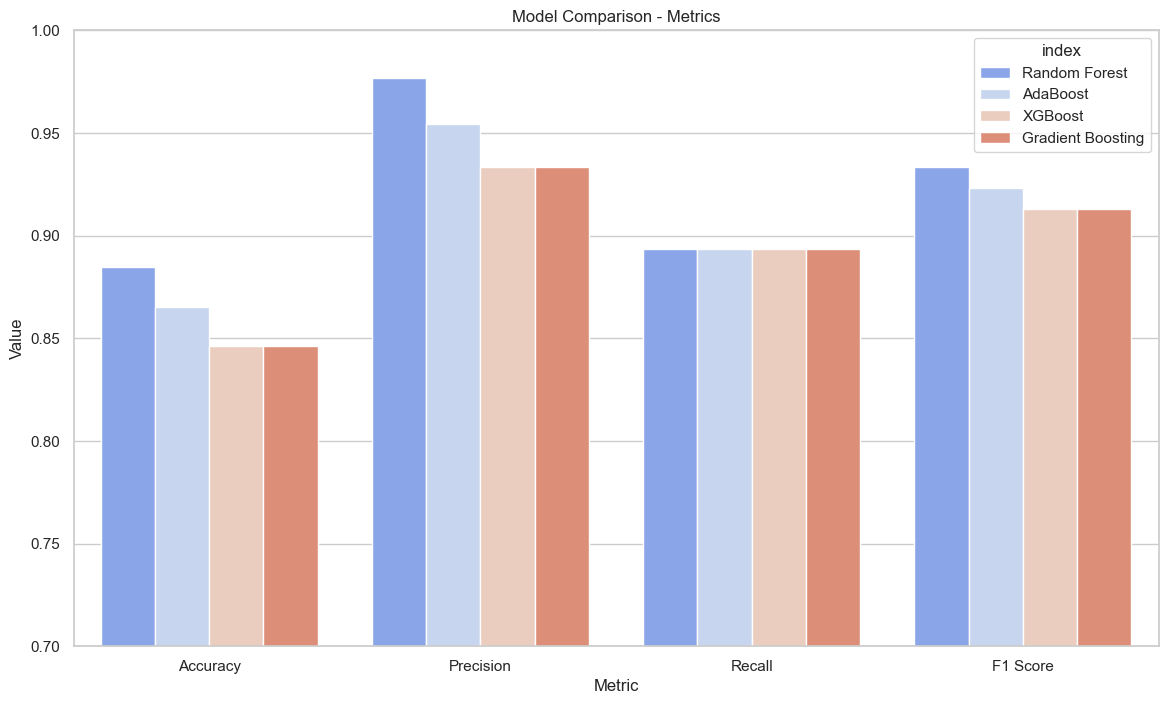

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape the results DataFrame to a long format
results_df_long = results_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

# Set up the plot
plt.figure(figsize=(14, 8))

# Create a clustered barplot
sns.barplot(x='Metric', y='Value', hue='index', data=results_df_long, palette='coolwarm')

# Set title and labels
plt.title('Model Comparison - Metrics')
plt.ylim(0.7, 1)  # Set y-axis limits to start from 0.7 and above
plt.xlabel('Metric')
plt.ylabel('Value')

# Display the plot
plt.show()

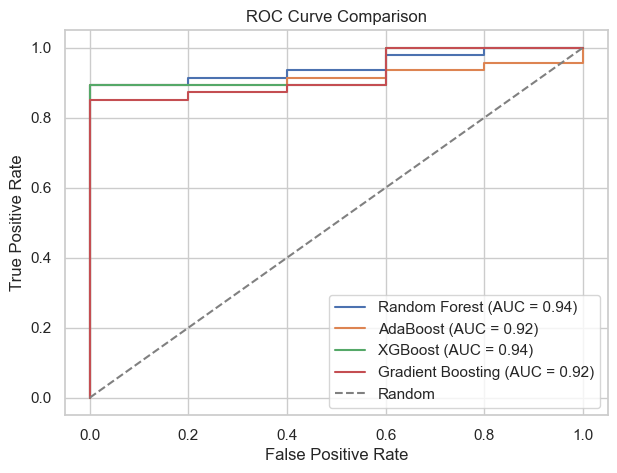

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(y_true, y_probs, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_probs[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot ROC curves for all models
plt.figure(figsize=(7, 5))

# Random Forest
plot_roc_curve(y_test, random_forest.predict_proba(X_test), 'Random Forest')

# AdaBoost
plot_roc_curve(y_test, adaboost.predict_proba(X_test), 'AdaBoost')

# XGBoost
plot_roc_curve(y_test, xgboost.predict_proba(X_test), 'XGBoost')

# Gradient Boosting
plot_roc_curve(y_test, gradient_boosting.predict_proba(X_test), 'Gradient Boosting')

# Plot the baseline (random) ROC curve
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

The ROC curve compares four types of forest models: Random Forest, AdaBoost, XGBoost, and Gradient Boosting.

The Random Forest and XGBoost models exhibit the highest AUC values (0.94), implying superior performance in distinguishing between classes.

The Gradient Boosting model follows with an AUC of 0.92, while the AdaBoost model has an AUC of 0.90.